In [ ]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# uploading the dataset to google colab
from google.colab import files
uploaded = files.upload()



Saving iris_data.csv to iris_data.csv


In [ ]:
# loading the dataset
df = pd.read_csv('iris_data.csv')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# checking for missing observations
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

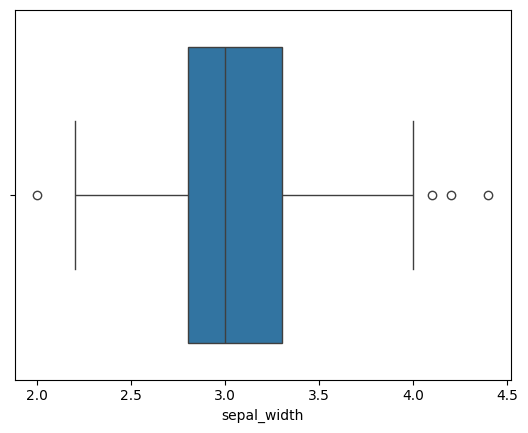

In [ ]:
#checking for outliers
sns.boxplot(df['sepal_width'], orient = 'h')
plt.show()

In [ ]:
upper_limit = df['sepal_width'].quantile(0.98)
lower_limit = df['sepal_width'].quantile(0.01)
print(upper_limit)
print(lower_limit)


4.002000000000001
2.2


In [ ]:
#  Winsorization
df['sepal_width'] = np.where(df['sepal_width'] >= upper_limit,
        upper_limit,
        np.where(df['sepal_width'] <= lower_limit,
        lower_limit,
        df['sepal_width']))

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.050707,3.758667,1.198667
std,0.828066,0.418581,1.764420,0.763161
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.002000,6.900000,2.500000


<Axes: ylabel='sepal_width'>

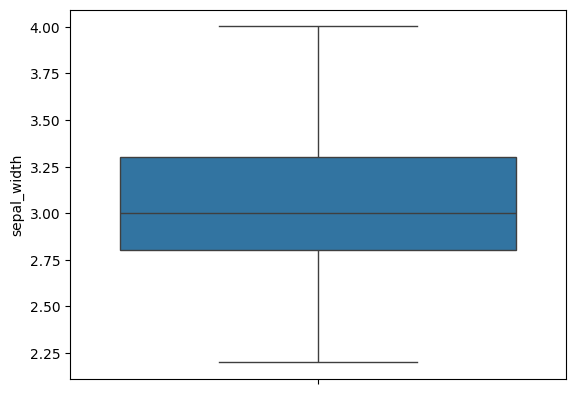

In [ ]:
sns.boxplot(df['sepal_width'])

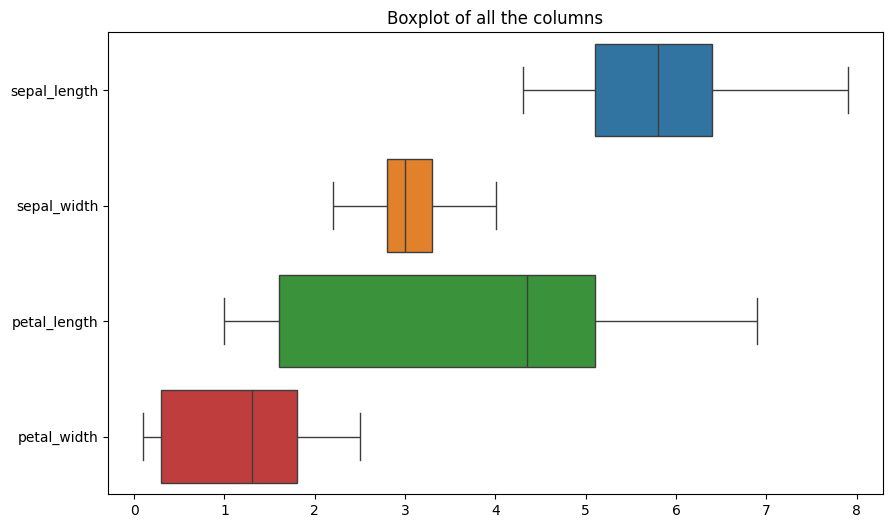

In [ ]:
# boxplot of all columns together
plt.figure(figsize = (10,6))
sns.boxplot(data = df, orient = 'h')
plt.title('Boxplot of all the columns')
plt.show()

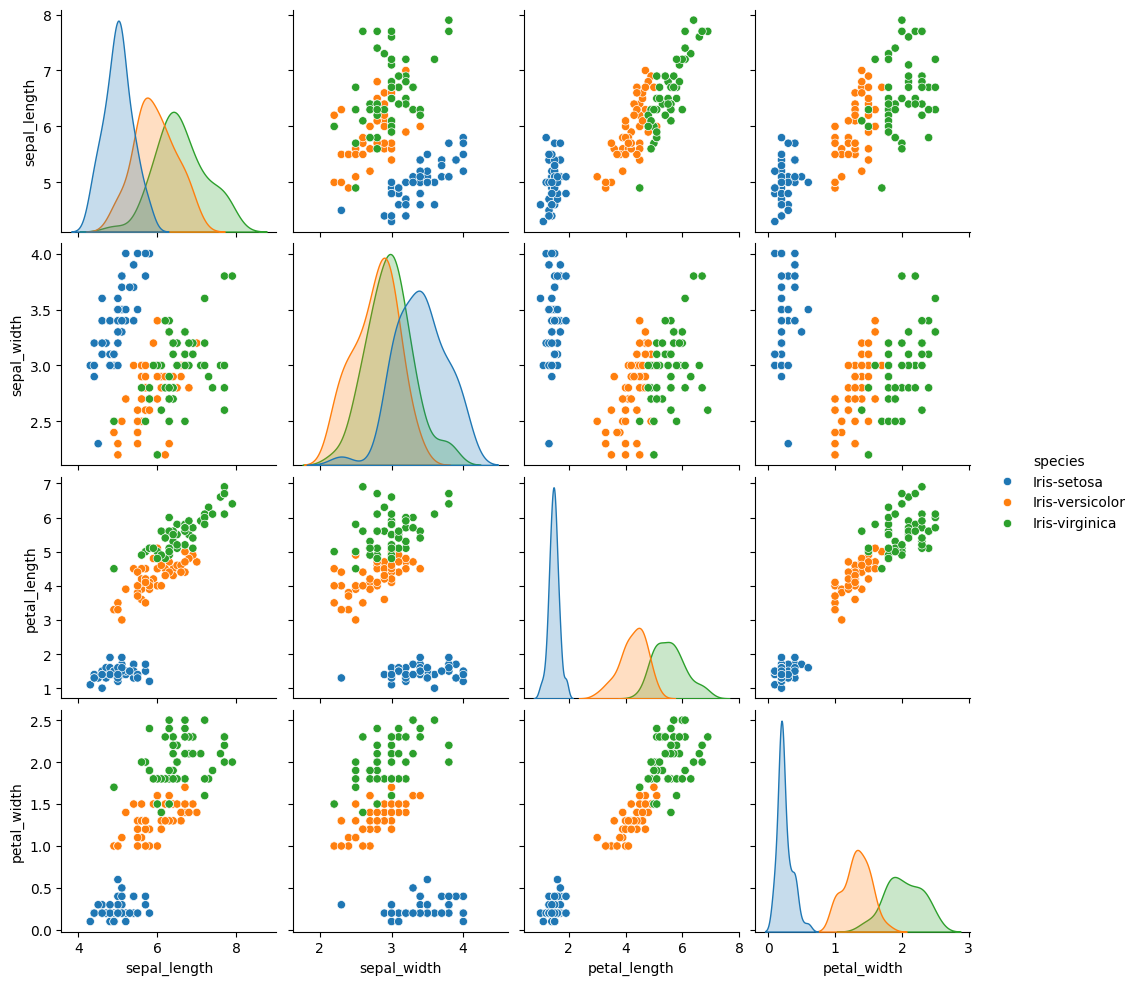

In [ ]:
sns.pairplot(df, hue='species')
plt.show()

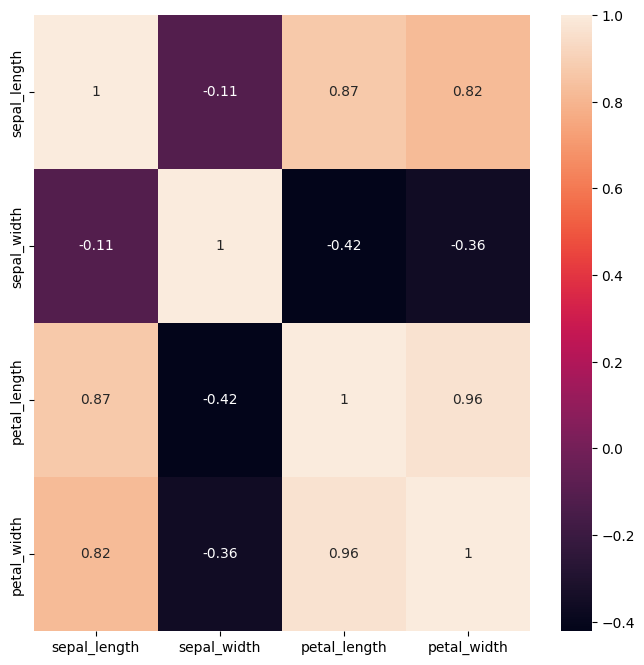

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.drop('species',axis=1).corr(),annot=True)
plt.show()

In [ ]:
# separating the dependent and independent variables
X = df.iloc[:,0:4]
y = df.iloc[:,4]

In [ ]:
# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 2)

In [ ]:
# Scaling the data
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Training the KNN Classifier
# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 31)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])})

In [ ]:
# Best parameter
print(f"Best number of neighbors: {knn_cv.best_params_['n_neighbors']}")

Best number of neighbors: 9


In [ ]:
# Train with the best parameter
best_knn = KNeighborsClassifier(n_neighbors=knn_cv.best_params_['n_neighbors'])
best_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:

y_pred = best_knn.predict(X_test)

In [ ]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy*100:.2f}','%')

Accuracy: 100.00 %


In [ ]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [ ]:
print('Confusion Matrix:')
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Confusion Matrix:
[[14  0  0]
 [ 0  8  0]
 [ 0  0  8]]


In [ ]:
#  Creating a Sample Dataset
sample_data = np.array([[5.4, 3.7, 1.5, 0.2],  # Setosa-like sample
                        [6.2, 3.4, 5.4, 2.3],  # Virginica-like sample
                        [5.6, 2.5, 3.9, 1.1]]) # Versicolor-like sample

sample_data = scaler.transform(sample_data)

sample_predictions = best_knn.predict(sample_data)


# Display the results
for i, prediction in enumerate(sample_predictions):
    print(f"Sample {i+1}: Predicted Species is {prediction}")

Sample 1: Predicted Species is Iris-setosa
Sample 2: Predicted Species is Iris-virginica
Sample 3: Predicted Species is Iris-versicolor


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
